In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
spotData = pd.read_csv('SpotifyDataset/data.csv')

In [3]:
spotData.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
spotData.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [5]:
spotData.drop(columns=['id', 'name', 'artists', 'release_date'],inplace = True)

In [6]:
spotData.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [7]:
spotData['year'] = spotData['year']-1921
spotData['year'] = spotData['year']/100

In [8]:
spotData['duration_ms'] = spotData['duration_ms']/1000

In [9]:
spotData['loudness'] = spotData['loudness']+60

In [10]:
spotData["key"].value_counts()

0     21499
7     20757
2     18821
9     17628
5     16336
4     12921
1     12816
10    12056
8     10711
11    10593
6      8586
3      7185
Name: key, dtype: int64

In [11]:
dummies = ['explicit','mode']
spotData = pd.get_dummies(spotData, columns = dummies)

In [12]:
spotData.rename(columns={"mode_0": "minor", "mode_1": "major","explicit_0":"appropriate","explicit_1":"explicit"},inplace= True)

In [13]:
spotData.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year,appropriate,explicit,minor,major
0,0.995,0.708,158.648,0.1950,0.563,10,0.1510,47.572,0,0.0506,118.469,0.7790,0.07,1,0,0,1
1,0.994,0.379,282.133,0.0135,0.901,8,0.0763,31.546,0,0.0462,83.972,0.0767,0.07,1,0,0,1
2,0.604,0.749,104.300,0.2200,0.000,5,0.1190,40.076,0,0.9290,107.177,0.8800,0.07,1,0,1,0
3,0.995,0.781,180.760,0.1300,0.887,1,0.1110,45.266,0,0.0926,108.003,0.7200,0.07,1,0,1,0
4,0.990,0.210,687.733,0.2040,0.908,11,0.0980,43.171,1,0.0424,62.149,0.0693,0.07,1,0,0,1


In [14]:
spotData.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year,appropriate,explicit,minor,major
count,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,231.406159,0.488593,0.161937,5.200519,0.206690,48.629711,31.556610,0.094058,116.948017,0.532095,0.562232,0.915137,0.084863,0.291444,0.708556
std,0.376627,0.175346,121.321923,0.267390,0.309329,3.515257,0.176796,5.666765,21.582614,0.149937,30.726937,0.262408,0.255932,0.278679,0.278679,0.454429,0.454429
min,0.000000,0.000000,5.108000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.094500,0.417000,171.040000,0.263000,0.000000,2.000000,0.098400,45.530000,12.000000,0.034900,93.516000,0.322000,0.360000,1.000000,0.000000,0.000000,0.000000
50%,0.492000,0.548000,208.600000,0.481000,0.000204,5.000000,0.135000,49.526000,33.000000,0.045000,114.778000,0.544000,0.570000,1.000000,0.000000,0.000000,1.000000
75%,0.888000,0.667000,262.960000,0.710000,0.086800,8.000000,0.263000,52.882000,48.000000,0.075400,135.712000,0.749000,0.780000,1.000000,0.000000,1.000000,1.000000
max,0.996000,0.988000,5403.500000,1.000000,1.000000,11.000000,1.000000,63.855000,100.000000,0.969000,244.091000,1.000000,0.990000,1.000000,1.000000,1.000000,1.000000


In [15]:
spotData.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year,appropriate,explicit,minor,major
acousticness,1.000000,-0.265950,-0.079311,-0.750283,0.335821,-0.021686,-0.023871,-0.567072,-0.593345,-0.056077,-0.204982,-0.185540,-0.624550,0.253690,-0.253690,-0.046475,0.046475
danceability,-0.265950,1.000000,-0.134500,0.220569,-0.281429,0.022599,-0.105532,0.294170,0.221077,0.225305,-0.004872,0.560242,0.203430,-0.241891,0.241891,0.045306,-0.045306
duration_ms,-0.079311,-0.134500,1.000000,0.036396,0.084814,-0.003116,0.034270,-0.014687,0.063292,-0.058449,-0.028816,-0.198760,0.076293,0.043811,-0.043811,0.046981,-0.046981
energy,-0.750283,0.220569,0.036396,1.000000,-0.287692,0.029984,0.126293,0.782982,0.497488,-0.045226,0.249936,0.350086,0.532419,-0.142677,0.142677,0.038355,-0.038355
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,1.000000,-0.014268,-0.047397,-0.417033,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571,0.138292,-0.138292,0.035051,-0.035051
key,-0.021686,0.022599,-0.003116,0.029984,-0.014268,1.000000,-0.000106,0.021920,0.010675,0.015225,0.003148,0.029064,0.012503,-0.008578,0.008578,0.112766,-0.112766
liveness,-0.023871,-0.105532,0.034270,0.126293,-0.047397,-0.000106,1.000000,0.052985,-0.075293,0.147667,0.008124,-0.000426,-0.055839,-0.039272,0.039272,-0.005393,0.005393
loudness,-0.567072,0.294170,-0.014687,0.782982,-0.417033,0.021920,0.052985,1.000000,0.466546,-0.105796,0.211114,0.308418,0.490118,-0.152695,0.152695,0.013147,-0.013147
popularity,-0.593345,0.221077,0.063292,0.497488,-0.299829,0.010675,-0.075293,0.466546,1.000000,-0.135707,0.135047,0.009327,0.880724,-0.214044,0.214044,0.032854,-0.032854
speechiness,-0.056077,0.225305,-0.058449,-0.045226,-0.115735,0.015225,0.147667,-0.105796,-0.135707,1.000000,-0.010070,0.056383,-0.120937,-0.413074,0.413074,0.057493,-0.057493


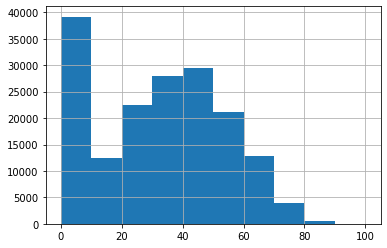

In [16]:
spotData['popularity'].hist()

In [17]:
spotData['popularity'] = np.where(spotData['popularity'].between(0,19,inclusive = True),0,spotData['popularity'])
spotData['popularity'] = np.where(spotData['popularity'].between(20,59,inclusive = True),1,spotData['popularity'])
spotData['popularity'] = np.where(spotData['popularity'].between(60,100,inclusive = True),2,spotData['popularity'])

In [18]:
spotData = spotData[~spotData.duplicated()==1]
spotData['popularity'].value_counts()

1    99870
0    50602
2    17104
Name: popularity, dtype: int64

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support 

In [21]:
randomFor = RandomForestClassifier()
kNeighbors = KNeighborsClassifier(n_neighbors=15)
svc = LinearSVC()
descTree = DecisionTreeClassifier()
bernNB = BernoulliNB()
scalerDepend = StandardScaler()

In [22]:
x = spotData.drop(columns=['popularity'])
y = spotData['popularity']

In [23]:
x = scalerDepend.fit_transform(x)

In [24]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.20)

In [25]:
yTrain.value_counts()

1    80041
0    40435
2    13584
Name: popularity, dtype: int64

In [26]:
randomFor.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
kNeighbors.fit(xTrain,yTrain) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [28]:
svc.fit(xTrain,yTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [29]:
descTree.fit(xTrain,yTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
bernNB.fit(xTrain,yTrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [31]:
yRanPred = randomFor.predict(xTest)

In [32]:
yKNeighPred = kNeighbors.predict(xTest)

In [33]:
ySVCPred = svc.predict(xTest)

In [34]:
yDescPred = descTree.predict(xTest)

In [35]:
yBNBPred = bernNB.predict(xTest)

In [36]:
RanAcc = accuracy_score(yTest,yRanPred)

In [37]:
KNAcc = accuracy_score(yTest,yKNeighPred)

In [38]:
SVCAcc = accuracy_score(yTest,ySVCPred)

In [39]:
DescAcc = accuracy_score(yTest,yDescPred)

In [40]:
BNBAcc = accuracy_score(yTest,yBNBPred)

In [41]:
print(" Accuracy scores are as follows: \n Random Forest : %0.2f \n KNeighbors : %0.2f \n SVC : %0.2f \n Decision Tree : %0.2f \n Bernoulli : %0.2f"  %(RanAcc, KNAcc, SVCAcc, DescAcc, BNBAcc))

 Accuracy scores are as follows: 
 Random Forest : 0.88 
 KNeighbors : 0.83 
 SVC : 0.83 
 Decision Tree : 0.81 
 Bernoulli : 0.74


In [42]:
precision_recall_fscore_support(yTest,yRanPred)

(array([0.88999337, 0.87702638, 0.80076082]),
 array([0.92465821, 0.92218468, 0.47840909]),
 array([0.90699469, 0.89903882, 0.59896852]),
 array([10167, 19829,  3520]))

In [43]:
confMat = confusion_matrix(yTest,yRanPred)
confMat

array([[ 9401,   750,    16],
       [ 1140, 18286,   403],
       [   22,  1814,  1684]])

In [44]:
precision_recall_fscore_support(yTest,yKNeighPred)

(array([0.86234818, 0.83208661, 0.67819642]),
 array([0.87990558, 0.90317212, 0.31193182]),
 array([0.87103841, 0.86617334, 0.42732049]),
 array([10167, 19829,  3520]))

In [45]:
confMat = confusion_matrix(yTest,yKNeighPred)
confMat 

array([[ 8946,  1215,     6],
       [ 1405, 17909,   515],
       [   23,  2399,  1098]])

In [46]:
precision_recall_fscore_support(yTest,ySVCPred)

(array([0.87591584, 0.81459783, 0.79166667]),
 array([0.91718304, 0.93262393, 0.03778409]),
 array([0.89607457, 0.86962451, 0.07212581]),
 array([10167, 19829,  3520]))

In [47]:
confMat = confusion_matrix(yTest,ySVCPred)
confMat

array([[ 9325,   842,     0],
       [ 1301, 18493,    35],
       [   20,  3367,   133]])

In [48]:
precision_recall_fscore_support(yTest,yDescPred)

(array([0.86955663, 0.84491139, 0.47293212]),
 array([0.86613554, 0.84154521, 0.48892045]),
 array([0.86784271, 0.84322494, 0.48079341]),
 array([10167, 19829,  3520]))

In [49]:
confMat = confusion_matrix(yTest,yDescPred)
confMat

array([[ 8806,  1317,    44],
       [ 1268, 16687,  1874],
       [   53,  1746,  1721]])

In [50]:
precision_recall_fscore_support(yTest,yBNBPred)

(array([0.72458599, 0.78751301, 0.39825466]),
 array([0.8391856 , 0.76332644, 0.28522727]),
 array([0.77768663, 0.77523112, 0.3323953 ]),
 array([10167, 19829,  3520]))

In [51]:
confMat = confusion_matrix(yTest,yBNBPred)
confMat

array([[ 8532,  1630,     5],
       [ 3181, 15136,  1512],
       [   62,  2454,  1004]])

In [52]:
RanForscores = cross_val_score(randomFor, x, y, cv=10)
RanForscores

array([0.94253491, 0.93597088, 0.86704857, 0.81250746, 0.82820146,
       0.68832796, 0.85623918, 0.87360506, 0.92653816, 0.9432476 ])

In [53]:
KNeighscores = cross_val_score(kNeighbors, x, y, cv=10)
KNeighscores

array([0.87325456, 0.85809763, 0.82133906, 0.78094045, 0.81919083,
       0.70056093, 0.84179746, 0.85146506, 0.8740228 , 0.87593245])

In [54]:
SVCscores = cross_val_score(svc, x, y, cv=10)
SVCscores

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

array([0.86179735, 0.8537415 , 0.84598401, 0.82444206, 0.82354696,
       0.6880296 , 0.81888166, 0.84120069, 0.86435519, 0.87330668])

In [55]:
DTscores = cross_val_score(descTree, x, y, cv=10)
DTscores

array([0.8535028 , 0.84747583, 0.79048813, 0.74418188, 0.77509249,
       0.6858217 , 0.81178015, 0.81625589, 0.85104732, 0.85092797])

In [56]:
BNBscores = cross_val_score(bernNB, x, y, cv=10)
BNBscores

array([0.76638024, 0.75951784, 0.74573338, 0.74829932, 0.7682301 ,
       0.61534789, 0.71170257, 0.73408128, 0.75484872, 0.76284538])

In [57]:
print("\nAccuracy of Random Forest : %0.2f (+/- %0.2f)" % (RanForscores.mean(), RanForscores.std() * 2))
print("\nAccuracy of K Neighbors : %0.2f (+/- %0.2f)" % (KNeighscores.mean(), KNeighscores.std() * 2))
print("\nAccuracy of SVC : %0.2f (+/- %0.2f)" % (SVCscores.mean(), SVCscores.std() * 2))
print("\nAccuracy of Decision Tree : %0.2f (+/- %0.2f)" % (DTscores.mean(), DTscores.std() * 2))
print("\nAccuracy of BernouliNB : %0.2f (+/- %0.2f)" % (BNBscores.mean(), BNBscores.std() * 2))


Accuracy of Random Forest : 0.87 (+/- 0.15)

Accuracy of K Neighbors : 0.83 (+/- 0.10)

Accuracy of SVC : 0.83 (+/- 0.10)

Accuracy of Decision Tree : 0.80 (+/- 0.10)

Accuracy of BernouliNB : 0.74 (+/- 0.09)
